<h1> DATA ANALYSIS

<H3>IMPORTING DATA LIBRARIES

In [2]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

<H3> IMPORTING DATASET

In [3]:
df=pd.read_excel(r'C:/Users/shahinz/Desktop/data.xlsx')


<H3> DATA AUDIT

In [4]:
#First five rows of data
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850,United Kingdom


In [5]:
#Shape of dataset
df.shape

(391150, 8)

In [6]:
#A concise summary of datset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391150 entries, 0 to 391149
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    391150 non-null  int64  
 1   StockCode    391150 non-null  object 
 2   Description  391150 non-null  object 
 3   Quantity     391150 non-null  int64  
 4   InvoiceDate  391150 non-null  object 
 5   UnitPrice    391150 non-null  float64
 6   CustomerID   391150 non-null  int64  
 7   Country      391150 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 23.9+ MB


In [7]:
#Changing the datatype for InvoiceDate 
df['InvoiceDate']=pd.to_datetime(df['InvoiceDate']).dt.date


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391150 entries, 0 to 391149
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    391150 non-null  int64  
 1   StockCode    391150 non-null  object 
 2   Description  391150 non-null  object 
 3   Quantity     391150 non-null  int64  
 4   InvoiceDate  391150 non-null  object 
 5   UnitPrice    391150 non-null  float64
 6   CustomerID   391150 non-null  int64  
 7   Country      391150 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 23.9+ MB


In [9]:
#Checking missing values
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [10]:
#Getting descriptive statistics summary
df.describe()

,InvoiceNo,Quantity,UnitPrice,CustomerID
count,391150.000000,391150.000000,391150.000000,391150.000000
mean,560592.908268,13.145300,2.874372,15295.171456
std,13087.235691,180.807831,4.284738,1710.339033
min,536365.000000,1.000000,0.040000,12346.000000
25%,549235.000000,2.000000,1.250000,13969.000000
50%,561875.000000,6.000000,1.950000,15159.000000
75%,572062.000000,12.000000,3.750000,16794.000000
max,581587.000000,80995.000000,649.500000,18287.000000


In [11]:
# Calculating the Price coloumn
df["Price"] = df['Quantity']  * df['UnitPrice']
df['Price']

0         15.30
1         20.34
2         22.00
3         20.34
4         20.34
          ...  
391145    10.20
391146    12.60
391147    16.60
391148    16.60
391149    14.85
Name: Price, Length: 391150, dtype: float64

<h1> EXPLORATORY DATA ANALYSIS

<h3>Sales Analysis

In [12]:
df['InvoiceDate'].min()

datetime.date(2010, 1, 12)

In [13]:
df['InvoiceDate'].max()

datetime.date(2011, 12, 10)

In [14]:
#Getting date month year from dataset
df['day_month_year']=df['InvoiceDate'].apply(lambda x: x.strftime('%Y-%m-%d'))

In [15]:
#Grouping day month year
df_salesvolumeday=df.groupby('day_month_year').sum()['Price'].reset_index()
df_salesvolumeday

,day_month_year,Price
0,2010-01-12,46035.29
1,2010-02-12,47164.57
2,2010-03-12,23530.93
3,2010-05-12,30905.32
4,2010-06-12,30807.90
...,...,...
300,2011-12-06,12307.09
301,2011-12-07,17732.49
302,2011-12-08,17677.52
303,2011-12-09,27777.36


<function matplotlib.pyplot.show(*args, **kw)>

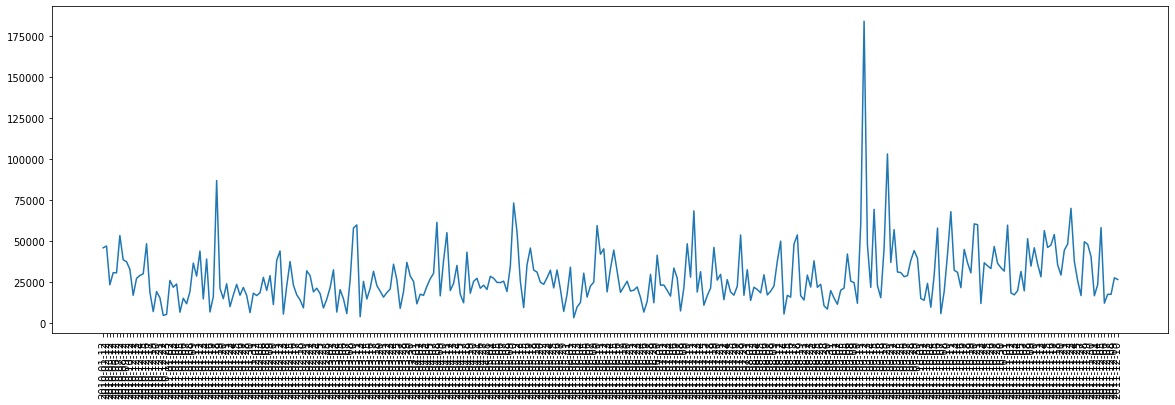

In [16]:
#Sales per day
plt.figure(figsize=(20,6))
plt.plot(df_salesvolumeday['day_month_year'],df_salesvolumeday['Price'])
plt.xticks(rotation='vertical',size=10)
plt.show

In [17]:
#Getting month Year sales volume
df['mon_yr']=df['InvoiceDate'].apply(lambda x: x.strftime('%Y-%m'))
df_salesvol_monyr=df.groupby('mon_yr').sum()['Price'].reset_index()
df_salesvol_monyr

,mon_yr,Price
0,2010-01,46035.29
1,2010-02,47164.57
2,2010-03,23530.93
3,2010-05,30905.32
4,2010-06,30807.90
5,2010-07,53514.96
6,2010-08,38742.24
7,2010-09,37600.91
8,2010-10,32910.38
9,2010-12,223987.06


<function matplotlib.pyplot.show(*args, **kw)>

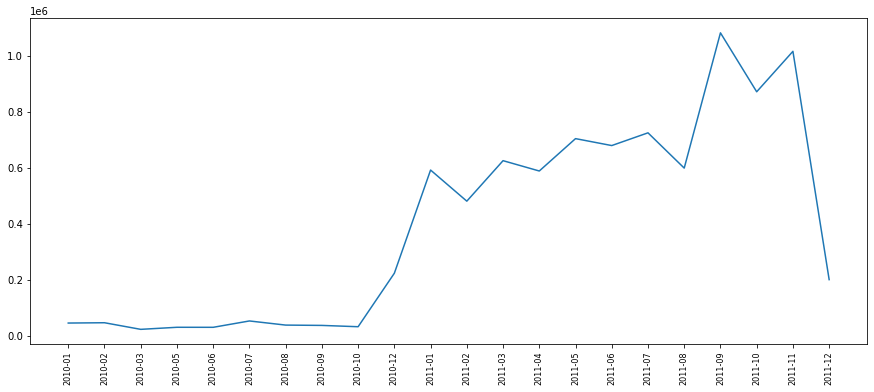

In [18]:
#Sales per month
plt.figure(figsize=(15,6))
plt.plot(df_salesvol_monyr['mon_yr'],df_salesvol_monyr['Price'])
plt.xticks(rotation='vertical',size=8)
plt.show

In [19]:
# Calculating sales per year
df['yr']=df['InvoiceDate'].apply(lambda x: x.strftime('%Y'))
df_salesvol_yr=df.groupby('yr').sum()['Price'].reset_index()
df_salesvol_yr.round(5)

,yr,Price
0,2010,565199.56
1,2011,8172028.08


<function matplotlib.pyplot.show(*args, **kw)>

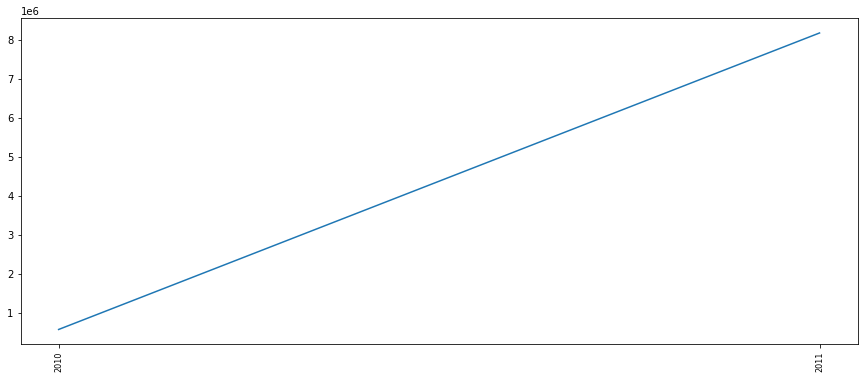

In [20]:
# Sales per year
plt.figure(figsize=(15,6))
plt.plot(df_salesvol_yr['yr'],df_salesvol_yr['Price'])
plt.xticks(rotation='vertical',size=8)
plt.show

<h3> Revenue by Product

In [21]:
#Grouping description column
des_sales=pd.DataFrame(df.groupby('Description').sum()['Price'])

In [22]:
#Sorting description_price
des_sales=des_sales.sort_values('Price',ascending=False)

In [23]:
#Products by Price
des_sales

,Price
Description,
"PAPER CRAFT , LITTLE BIRDIE",168469.60
REGENCY CAKESTAND 3 TIER,142264.75
WHITE HANGING HEART T-LIGHT HOLDER,100392.10
JUMBO BAG RED RETROSPOT,85040.54
MEDIUM CERAMIC TOP STORAGE JAR,81416.73
...,...
PINK CRYSTAL GUITAR PHONE CHARM,0.85
PURPLE FRANGIPANI HAIRCLIP,0.85
VINTAGE BLUE TINSEL REEL,0.84


In [24]:
#Top 10 products by Price
des_sales[:10]

,Price
Description,
"PAPER CRAFT , LITTLE BIRDIE",168469.60
REGENCY CAKESTAND 3 TIER,142264.75
WHITE HANGING HEART T-LIGHT HOLDER,100392.10
JUMBO BAG RED RETROSPOT,85040.54
MEDIUM CERAMIC TOP STORAGE JAR,81416.73
PARTY BUNTING,68785.23
ASSORTED COLOUR BIRD ORNAMENT,56413.03
RABBIT NIGHT LIGHT,51251.24
CHILLI LIGHTS,46265.11


<h3>10 most Popular products

In [25]:
#Grouping Products and Customers by Quantity to get items per order details
des_customer=pd.DataFrame(df.groupby(['CustomerID','InvoiceNo','Description']).count()['Quantity'])

des_customer

Quantity
CustomerID InvoiceNo Description                                  
12346      541431    MEDIUM CERAMIC TOP STORAGE JAR              1
12347      537626    3D DOG PICTURE PLAYING CARDS                1
                     AIRLINE BAG VINTAGE JET SET BROWN           1
                     ALARM CLOCK BAKELIKE CHOCOLATE              1
                     ALARM CLOCK BAKELIKE GREEN                  1
...                                                            ...
18287      570715    SWISS CHALET TREE DECORATION                1
                     TREE T-LIGHT HOLDER WILLIE WINKIE           1
           573167    PAINTED METAL STAR WITH HOLLY BELLS         1
                     SET OF 3 WOODEN SLEIGH DECORATIONS          1
                     SWISS CHALET TREE DECORATION                1

[386223 rows x 1 columns]

In [26]:
# Calculating no of unique invoices per customer
des_pop=pd.DataFrame(df.groupby(['CustomerID','Quantity','Description']).count()['InvoiceNo'])
des_pop[:15]
    

InvoiceNo
CustomerID Quantity Description                                   
12346      74215    MEDIUM CERAMIC TOP STORAGE JAR               1
12347      2        REGENCY TEAPOT ROSES                         2
           3        REGENCY CAKESTAND 3 TIER                     3
                    SET/3 DECOUPAGE STACKING TINS                1
           4        AIRLINE BAG VINTAGE JET SET BROWN            5
                    AIRLINE BAG VINTAGE JET SET RED              2
                    AIRLINE BAG VINTAGE JET SET WHITE            3
                    AIRLINE BAG VINTAGE TOKYO 78                 1
                    AIRLINE BAG VINTAGE WORLD CHAMPION           2
                    ALARM CLOCK BAKELIKE CHOCOLATE               3
                    ALARM CLOCK BAKELIKE GREEN                   2
                    ALARM CLOCK BAKELIKE ORANGE                  2
                    ALARM CLOCK BAKELIKE PINK                    2
                    ALARM CLOCK BAKELIKE RED                     2
                    REGENCY MILK JUG PINK                        2

In [79]:
#Counting the second Invoice per customer
des_pop=des_pop.where(des_pop['InvoiceNo'] ==2,inplace=False,axis=None)
des_pop=des_pop.dropna()
des_pop

InvoiceNo
CustomerID Quantity Description                                  
15749      3114     FAIRY CAKE FLANNEL ASSORTED COLOUR        2.0
16029      2400     GROW A FLYTRAP OR SUNFLOWER IN TIN        2.0
15749      2000     GIN + TONIC DIET METAL SIGN               2.0
16308      2000     SMALL CHINESE STYLE SCISSOR               2.0
15749      1930     WHITE HANGING HEART T-LIGHT HOLDER        2.0
...                                                           ...
15426      1        STRIPES DESIGN TEDDY                      2.0
16395      1        JUMBO BAG STRAWBERRY                      2.0
                    YELLOW GIANT GARDEN THERMOMETER           2.0
                    RECIPE BOX BLUE SKETCHBOOK DESIGN         2.0
14730      1        SET OF 6 SPICE TINS PANTRY DESIGN         2.0

[31188 rows x 1 columns]

In [80]:
#Sorting by Quantity
des_pop=des_pop.sort_values(['Quantity'],ascending = (False))
des_pop

,,,InvoiceNo
CustomerID,Quantity,Description,
15749,3114,FAIRY CAKE FLANNEL ASSORTED COLOUR,2.0
16029,2400,GROW A FLYTRAP OR SUNFLOWER IN TIN,2.0
15749,2000,GIN + TONIC DIET METAL SIGN,2.0
16308,2000,SMALL CHINESE STYLE SCISSOR,2.0
15749,1930,WHITE HANGING HEART T-LIGHT HOLDER,2.0
...,...,...,...
12748,1,BLUE PAISLEY TISSUE BOX,2.0
13488,1,STOOL HOME SWEET HOME,2.0
12748,1,BIRTHDAY PARTY CORDON BARRIER TAPE,2.0


In [81]:
#Top 10 most popular products on second purchase
des_pop[:10]

,,,InvoiceNo
CustomerID,Quantity,Description,
15749,3114,FAIRY CAKE FLANNEL ASSORTED COLOUR,2.0
16029,2400,GROW A FLYTRAP OR SUNFLOWER IN TIN,2.0
15749,2000,GIN + TONIC DIET METAL SIGN,2.0
16308,2000,SMALL CHINESE STYLE SCISSOR,2.0
15749,1930,WHITE HANGING HEART T-LIGHT HOLDER,2.0
13316,1440,GIRLS ALPHABET IRON ON PATCHES,2.0
15749,1300,TEA TIME TEA TOWELS,2.0
16333,1056,GROW A FLYTRAP OR SUNFLOWER IN TIN,2.0
13848,1000,SMALL CHINESE STYLE SCISSOR,2.0
